**Part 2: Poisson, and Gamma Distributions**
The Connecticut State Museum of Natural History at UCONN holds annual mushroom hunting
trips in a mountain in Ashford. It is a half-day trip lasting about 4 hours in a weekend in
October. It is known that each participant collects about 8 mushrooms in the trip and the
event’s program fee is $20. You are pondering if you like to participate in this year’s event by considering various factors.

Q1. What is the probability that you collect “at least” 10 mushrooms? Since you are paying $20
fee, you are interested in figuring out if you can recoup your investment by estimating $2 per
fresh organic mushroom. As long as the chance is over 60%, you like to register the event. Show
your decision with two accompanying probability distribution plots, one PMF and one CDF.
Show also the simulated PMF using poisson.rvs. You show three plots in total.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

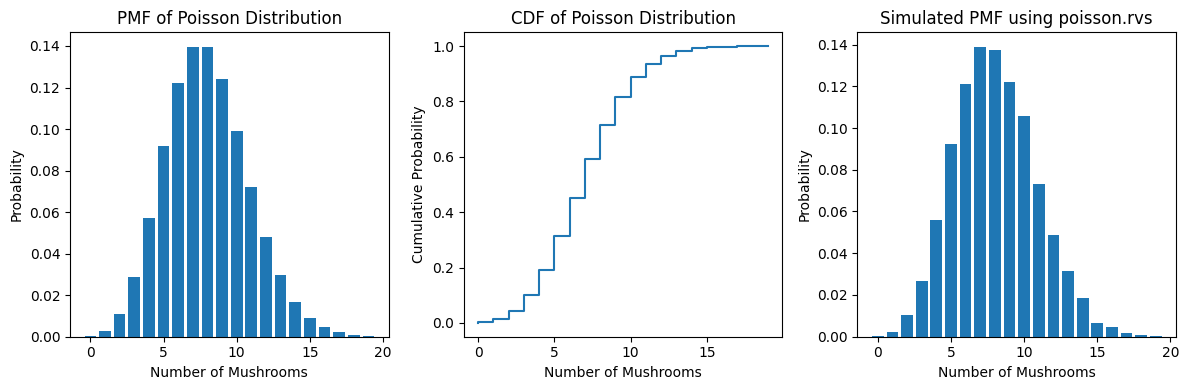

Probability of collecting at least 10 mushrooms: 0.2834
Decision: Do not register


In [4]:
avg_mush_collected = 8 #lambda_param = 8  
at_least = 10  #k

prob_at_least_10 = 1 - sps.poisson.cdf(at_least-1, avg_mush_collected)

x = np.arange(0, 20)
pmf = sps.poisson.pmf(x, avg_mush_collected)

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.bar(x, pmf)
plt.title('PMF of Poisson Distribution')
plt.xlabel('Number of Mushrooms')
plt.ylabel('Probability')

cdf = sps.poisson.cdf(x, avg_mush_collected)

plt.subplot(132)
plt.step(x, cdf)
plt.title('CDF of Poisson Distribution')
plt.xlabel('Number of Mushrooms')
plt.ylabel('Cumulative Probability')

simulated_data = sps.poisson.rvs(avg_mush_collected, size=10000)
simulated_pmf = np.bincount(simulated_data) / len(simulated_data)

plt.subplot(133)
plt.bar(range(len(simulated_pmf)), simulated_pmf)
plt.title('Simulated PMF using poisson.rvs')
plt.xlabel('Number of Mushrooms')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

print(f"Probability of collecting at least 10 mushrooms: {prob_at_least_10:.4f}")
print(f"Decision: {'Register' if prob_at_least_10 > 0.6 else 'Do not register'}")


Q2. You are anxious to know how quickly you can collect the first mushroom from the trip. This
is because your priority is not recouping your investment for the event but to enjoy the
excitement of finding the first fresh wild mushroom and come back to complete the homework
after you found one. What is the probability that you can get the first mushroom within one
hour of the trip? As long as the chance is over 60%, you like to register the event. Show your
decision with an accompanying probability distribution plot.

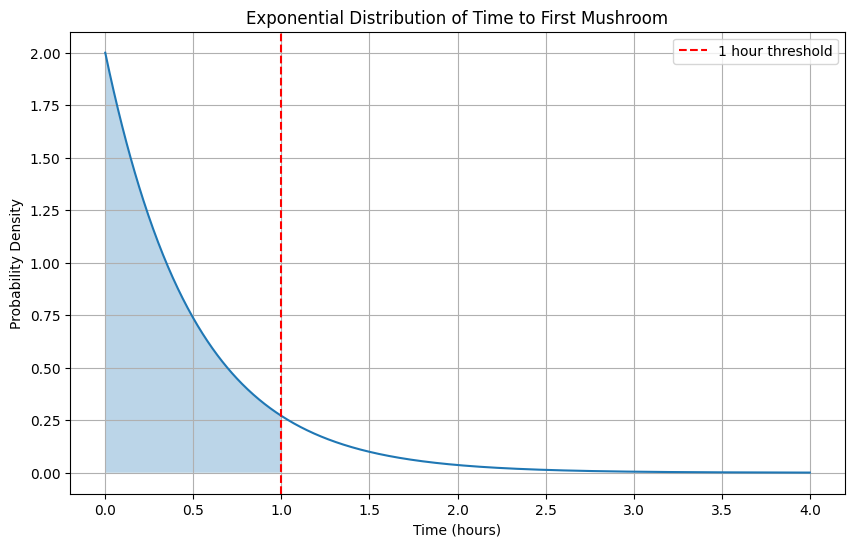

Probability of finding the first mushroom within one hour: 0.8647
Decision: Register


In [6]:
mush_hour = 2
time_hours = 1

prob_hour = 1 - np.exp(-mush_hour * time_hours)

x = np.linspace(0, 4, 1000)
y = sps.expon.pdf(x, scale=1/mush_hour)


plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.fill_between(x[x <= time_hours], y[x <= time_hours], alpha=0.3)
plt.title('Exponential Distribution of Time to First Mushroom')
plt.xlabel('Time (hours)')
plt.ylabel('Probability Density')
plt.axvline(x=time_hours, color='r', linestyle='--', label='1 hour threshold')
plt.legend()
plt.grid(True)
plt.show()


print(f"Probability of finding the first mushroom within one hour: {prob_hour:.4f}")
print(f"Decision: {'Register' if prob_hour > 0.6 else 'Do not register'}")

Q3. You are exploring a different scenario. Why not recoup some investment and also come
back early to complete the homework? What is the probability that you can get the four
mushrooms within 2 hours of the trip? As long as the chance is over 60%, you like to register
the event. Show your decision with an accompanying probability distribution plot.


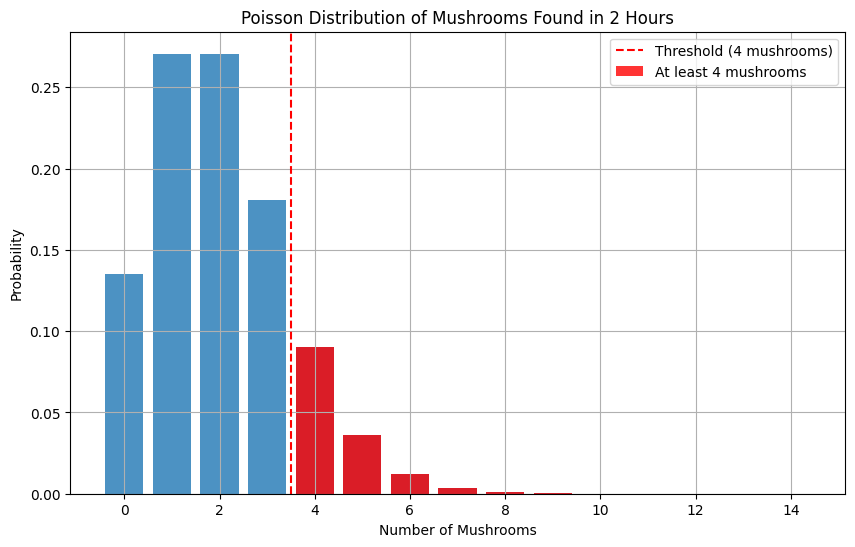

Probability of finding at least 4 mushrooms within two hours: 0.5665
Decision: Do not register


In [9]:
mush_two_hour = (8 / 4) * 2
num_mush = 4

prob_at_least_4 = 1 - sps.poisson.cdf(num_mush-1, mush_two_hour)

x = np.arange(0, 15)
pmf = sps.poisson.pmf(x, mush_hour)

plt.figure(figsize=(10, 6))
plt.bar(x, pmf, alpha=0.8)
plt.bar(x[x >= num_mush], pmf[x >= num_mush], alpha=0.8, color='red', label='At least 4 mushrooms')
plt.title('Poisson Distribution of Mushrooms Found in 2 Hours')
plt.xlabel('Number of Mushrooms')
plt.ylabel('Probability')
plt.axvline(x=num_mush-0.5, color='r', linestyle='--', label='Threshold (4 mushrooms)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Probability of finding at least 4 mushrooms within two hours: {prob_at_least_4:.4f}")
print(f"Decision: {'Register' if prob_at_least_4 > 0.6 else 'Do not register'}")

**Part 3: Beta Distribution**

Consider back to NBA statistics. Giannis Antetokounmpo having nick name “Greek Freak” was
instrumental in helping Milwaukee win 2020-2021 NBA championship. His FG% for the season
was 0.569 (Wikipedia).

Q1. Assume his FG% was from making 1140 goals from 2003 shots (attempts). Create a Beta
distribution plot for Giannis Antetokounmpo’s FG% for that season.

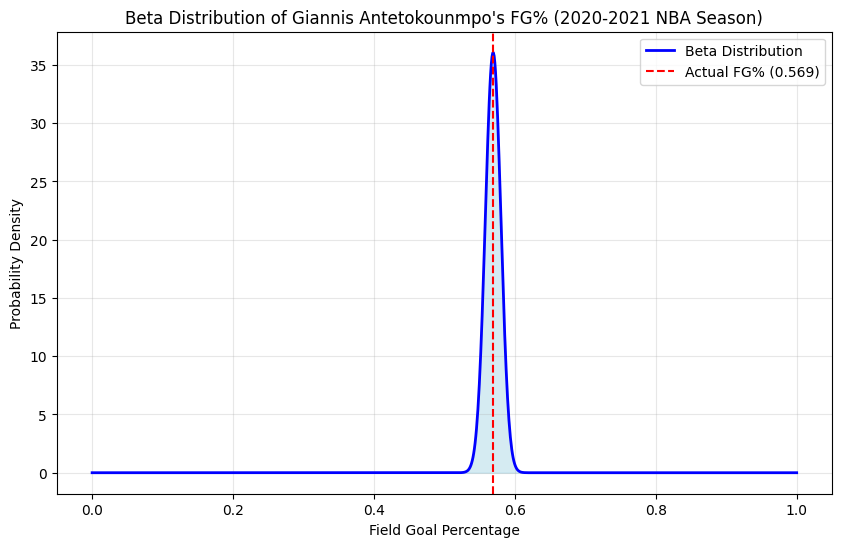

In [10]:
# Set the parameters
alpha = 1141
beta_param = 864

# Create an array of x values
x = np.linspace(0, 1, 1000)

# Calculate the Beta distribution
y = sps.beta.pdf(x, alpha, beta_param)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2, label='Beta Distribution')
plt.fill_between(x, y, color='lightblue', alpha=0.5)

# Add a vertical line for the actual FG%
actual_fg = 0.569
plt.axvline(x=actual_fg, color='r', linestyle='--', label=f'Actual FG% ({actual_fg:.3f})')

# Customize the plot
plt.title("Beta Distribution of Giannis Antetokounmpo's FG% (2020-2021 NBA Season)")
plt.xlabel('Field Goal Percentage')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

Q2. Suppose this Greek Freak did 27 goals from 35 shots during the first game in Fall 2021. Can
you estimate his FG% for the upcoming season using beta distribution? You are approximating
 and  for this and rely on the python function to create the Beta distribution plot similar to
what has been discussed in class, i.e., show both prior and posterior distributions.

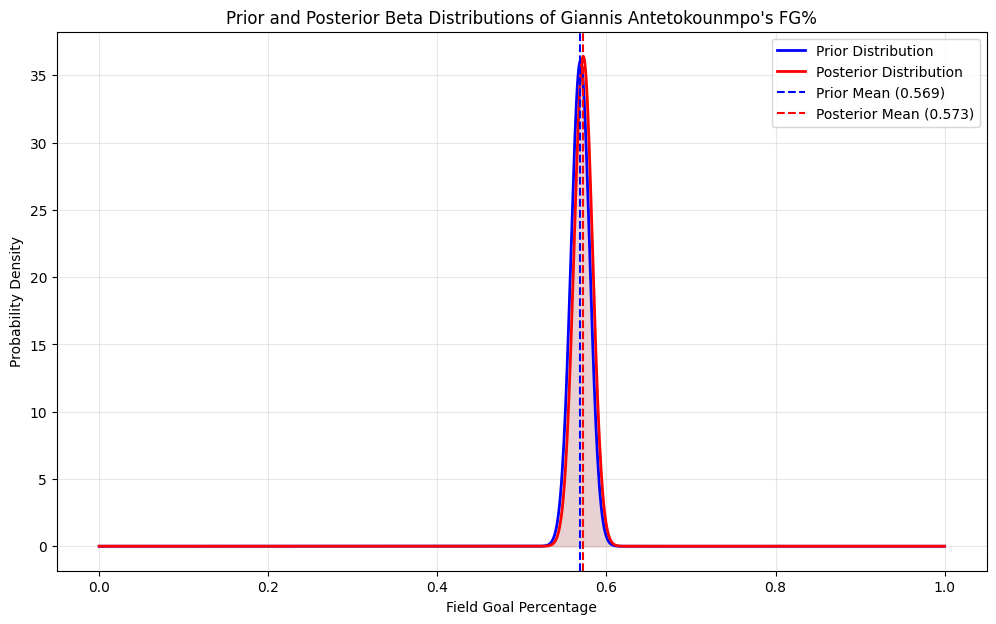

Estimated FG% for the upcoming season: 0.573


In [11]:
# Set the parameters
alpha_prior, beta_prior = 1141, 864
alpha_posterior, beta_posterior = 1168, 872

# Create an array of x values
x = np.linspace(0, 1, 1000)

# Calculate the prior and posterior Beta distributions
y_prior = sps.beta.pdf(x, alpha_prior, beta_prior)
y_posterior = sps.beta.pdf(x, alpha_posterior, beta_posterior)

# Create the plot
plt.figure(figsize=(12, 7))
plt.plot(x, y_prior, 'b-', lw=2, label='Prior Distribution')
plt.plot(x, y_posterior, 'r-', lw=2, label='Posterior Distribution')
plt.fill_between(x, y_prior, color='lightblue', alpha=0.3)
plt.fill_between(x, y_posterior, color='lightcoral', alpha=0.3)

# Add vertical lines for the mean FG%
prior_mean = alpha_prior / (alpha_prior + beta_prior)
posterior_mean = alpha_posterior / (alpha_posterior + beta_posterior)
plt.axvline(x=prior_mean, color='blue', linestyle='--', label=f'Prior Mean ({prior_mean:.3f})')
plt.axvline(x=posterior_mean, color='red', linestyle='--', label=f'Posterior Mean ({posterior_mean:.3f})')

# Customize the plot
plt.title("Prior and Posterior Beta Distributions of Giannis Antetokounmpo's FG%")
plt.xlabel('Field Goal Percentage')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

# Print the estimated FG% for the upcoming season
print(f"Estimated FG% for the upcoming season: {posterior_mean:.3f}")